# 1.) Pull in Data and Convert to Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [7]:
df['Diff'] = df['Adj Close'].diff().shift(-1)
df['Target'] = np.sign(df['Diff'])
df['Premium'] = 0.08 * df['Adj Close']
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31 00:00:00-05:00,0.117887,-0.020296,-1.0,0.009431
1981-01-31 00:00:00-05:00,0.097591,-0.006045,-1.0,0.007807
1981-02-28 00:00:00-05:00,0.091546,-0.006909,-1.0,0.007324
1981-03-31 00:00:00-05:00,0.084637,0.013386,1.0,0.006771
1981-04-30 00:00:00-04:00,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [8]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [9]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [10]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [11]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [15]:
df['Predictions'] = y_pred

In [16]:
df["Profits"] = 0

df.loc[(df['Predictions'] == 1) & (df['Target'] == 1), 'Profits'] = df['Premium']

df.loc[(df['Predictions'] == 1) & (df['Target'] == -1), 'Profits'] = 100*df['Diff'] + df['Premium']

# 5.) Plot profits over time

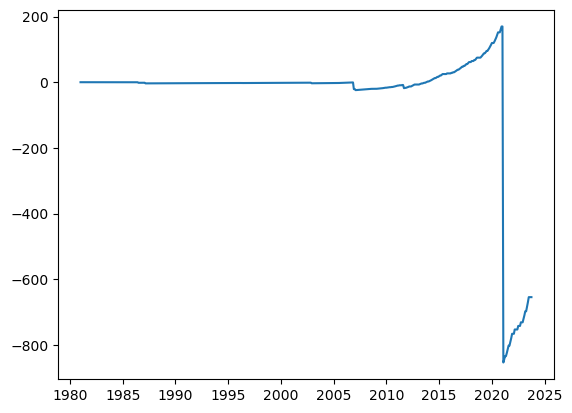

In [17]:
plt.plot(np.cumsum(df['Profits']))

# Q5.5.) Short write up about how you see your skills valuable to PJ and/or Philip Liu

I think that understanding the dynamics of the cryptocurrency market is fundamental in making informed content decisions that relate to cryptocurrencies and cryptocurrency trading. In this regard, the skils that we learn in the Master of Quantitative Economics program of UCLA will be useful since the course focuses on leveraging our skills with respect to the fields of economics, data science, and machine learning. Philip Liu's venture called StarsArena could definitely benefit from the analysis of the data that they receive as well generate through data science/machine learning techniques to analyze user engagement, sentiment, and trends within the crypto community. This analysis could help creators determine the currently popular topics in the platform which would be beneficial for creators to tailor their content to audience preferences which can strategically position themselves in the crypto space, fostering community engagement and staying ahead in a rapidly evolving landscape.